In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import *
import sys
sys.path.append('..')
from skreflectometry.waveguides import *

# Best fit function

The fit function used to calculate the dispersion in waveguides is as follows:
$$a + \frac{b}{\sqrt{1-\left(\frac{F_c}{F}\right)^2}}$$
The cutoff frequencies $F_c$ for the waveguides are listed in https://www.everythingrf.com/tech-resources/waveguides-sizes.
In this example we will use the 3 bands from the COMPASS tokamak.

Band | EIA | cutoff f [GHz]
---|---|---
K | WR-42 | 14.051 
Ka | WR-28 | 21.077
U | WR-19 | 31.391


The cutoff frequencies can also be calculated using provided tools.

In [34]:
standards = ['WR-42', 'WR-28', 'WR-19']

#Get the Band names and cutoff frequencies
bands = []
cutoff_freqs = []

for std in standards:
    bands.append(get_band(std))
    a, b = get_dimensions(std)#We don't need to store the waveguide dimensions
    cutoff_freqs.append(cutoff(a))

fc = 0.0
#Defines the fit function previously described
def fitfunc(x, a, b):
    return a + b/np.sqrt(1.0-(fc/x)**2)

#Optimized fit Parameters storage
popts = []
#...and Covariance matrices
pcovs = []

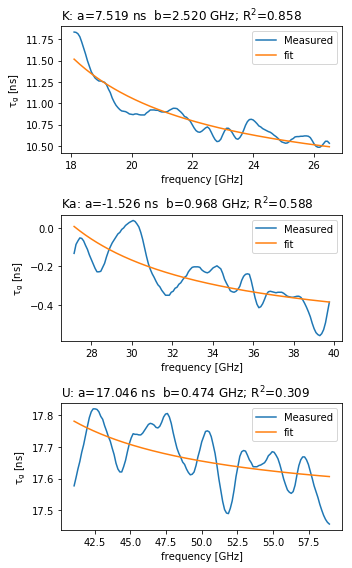

In [36]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5,8))

for band, i in zip(bands, range(len(bands))):
    fname = f"../data/{band}-LFS_to_fit.dat"
    file = np.loadtxt(fname)
    freq = file[:,0]
    tau = file[:,1]*1e9
    ax[i].plot(freq, tau, label='Measured')        
    ax[i].set_xlabel(r'frequency [GHz]')
    ax[i].set_ylabel(r'$\mathrm{\tau_g}$ [ns]')
    
    fc = cutoff_freqs[i]*1e-9
    popt, pcov = curve_fit(fitfunc, freq, tau)
    popts.append(popt)
    pcovs.append(pcov)
    ax[i].plot(freq, fitfunc(freq, *popt), label='fit')
    ax[i].legend()
    r2 = rsquare(freq, tau, popt, fitfunc)
    title_str = band + ': a=%0.3f ns'%(popt[0]) + '  b=%0.3f GHz; '%(popt[1]) + r'$\mathrm{R^2}$=%0.3f'%(r2)
    ax[i].set_title(title_str, loc='left')
        
plt.tight_layout()
plt.show()